In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from functools import reduce

# 1: Biggest predictor of CO2 output




In [ ]:
# Reading in Data
emissions_df = 'annual-co2-emissions-per-country.csv'
capita_df = 'co-emissions-per-capita.csv'
gdp_df = 'gdp-per-capita-maddison-2020.csv'
energy_df = 'per-capita-energy-source-stacked.csv'
land_use_df = 'global-co2-fossil-plus-land-use.csv'
cars_per1000_df = 'road-motor-vehicle-ownership-per-1000-people-2014.csv'
cost_df = 'levelized-cost-of-energy.csv'
food_foot_print_df = 'food-footprints.csv'

In [ ]:
emissions = pd.read_csv(emissions_df)
capita = pd.read_csv(capita_df)
gdp = pd.read_csv(gdp_df)
energy = pd.read_csv(energy_df)
cars = pd.read_csv(cars_per1000_df)
cost = pd.read_csv(cost_df)
land_use = pd.read_csv(land_use_df)
#food_print = pd.read_csv(food_foot_print_df)



In [ ]:
# Merging Data
# Based on the overlapping column is the choosen datasets
emissions_capita = pd.merge(emissions, capita, on=['Entity', 'Code', 'Year'])
emissions_capita_gdp = pd.merge(emissions_capita, gdp, on=['Entity', 'Code', 'Year'])
energy_cars = pd.merge(energy, cars, on=['Entity', 'Code', 'Year'])

emissions_capita_gdp.drop(columns = ["417485-annotations", "Code"], inplace = True)
energy_cars.drop(columns = 'Code', inplace = True)




In [ ]:
## Year 2014 is choosen because its the most complete dataset
df = pd.merge(emissions_capita_gdp, energy_cars, on=['Entity', 'Year'])
new_df= df[df['Year'].astype(str).str.contains('2014')]

new_df.columns = ['Country', 'Year', 'Annual_co2', 'Annual_co2_per_cap', 'GDP_per_cap', 'Fossil_per_cap', 'Nuclear_per_cap', 'Renewable_per_cap', 'Cars_per_1000']

In [ ]:
new_df

,Country,Year,Annual_co2,Annual_co2_per_cap,GDP_per_cap,Fossil_per_cap,Nuclear_per_cap,Renewable_per_cap,Cars_per_1000
0,Algeria,2014,1.512828e+08,3.903047,13744.0,15027.486328,0.000000,17.678438,114
1,Argentina,2014,1.883965e+08,4.399314,19183.0,20108.048828,336.192535,2536.880859,314
2,Australia,2014,3.939529e+08,16.785683,47867.0,62277.480469,0.000000,3960.939941,717
3,Austria,2014,6.416000e+07,7.507548,41338.0,29037.287109,0.000000,16791.980469,578
4,Azerbaijan,2014,3.434843e+07,3.525852,17439.0,16081.031250,NaN,401.112335,101
...,...,...,...,...,...,...,...,...,...
74,United Kingdom,2014,4.388071e+08,6.774484,36436.0,28730.859375,2533.077881,3045.734131,519
75,United States,2014,5.528871e+09,17.168596,51664.0,68806.257812,6845.298340,5924.801758,797
76,Uzbekistan,2014,1.073995e+08,3.527477,9085.0,17980.089844,NaN,550.699280,37
77,Venezuela,2014,1.759613e+08,5.827834,20317.0,25457.541016,0.000000,7256.701660,147


In [ ]:
plt.style.use('ggplot')

x1= new_df['Annual_co2_per_cap']
y1=  new_df[ 'Fossil_per_cap']

# Emission vs Fossil Fuels
# plt.figure(figsize=(10,5))
# plt.scatter(x,y)
# plt.ylabel("Fossil Fuels (KWh")
# plt.xlabel("Annual CO2 emissions")
# plt.title("Comparison Between CO2 Emissions and Fossil Fuel Usage per Capita")
# plt.show()

In [ ]:
# creating individual plots 
x2 = new_df['Annual_co2_per_cap']
y2= new_df['GDP_per_cap']

# plt.figure(figsize=(10,5))
# plt.scatter(x,y)

# plt.ylabel("GDP Per Capita")
# plt.xlabel("Annual CO2 Emissions")
# plt.title("Comparison Between CO2 Emissions and GDP per Capita")
# plt.show()

In [ ]:
# creating individual plots 
x3 = new_df['Annual_co2_per_cap']
y3= new_df['Cars_per_1000']

# plt.figure(figsize=(10,5))
# plt.scatter(x,y)

# plt.ylabel("Motor vehicles per 1000 people")
# plt.xlabel("Annual CO₂ emissions (per capita)")
# plt.title("Comparison Between CO2 Emissions and Motor Vehicles")
# plt.show()

<ipython-input-11-991cc170323e>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


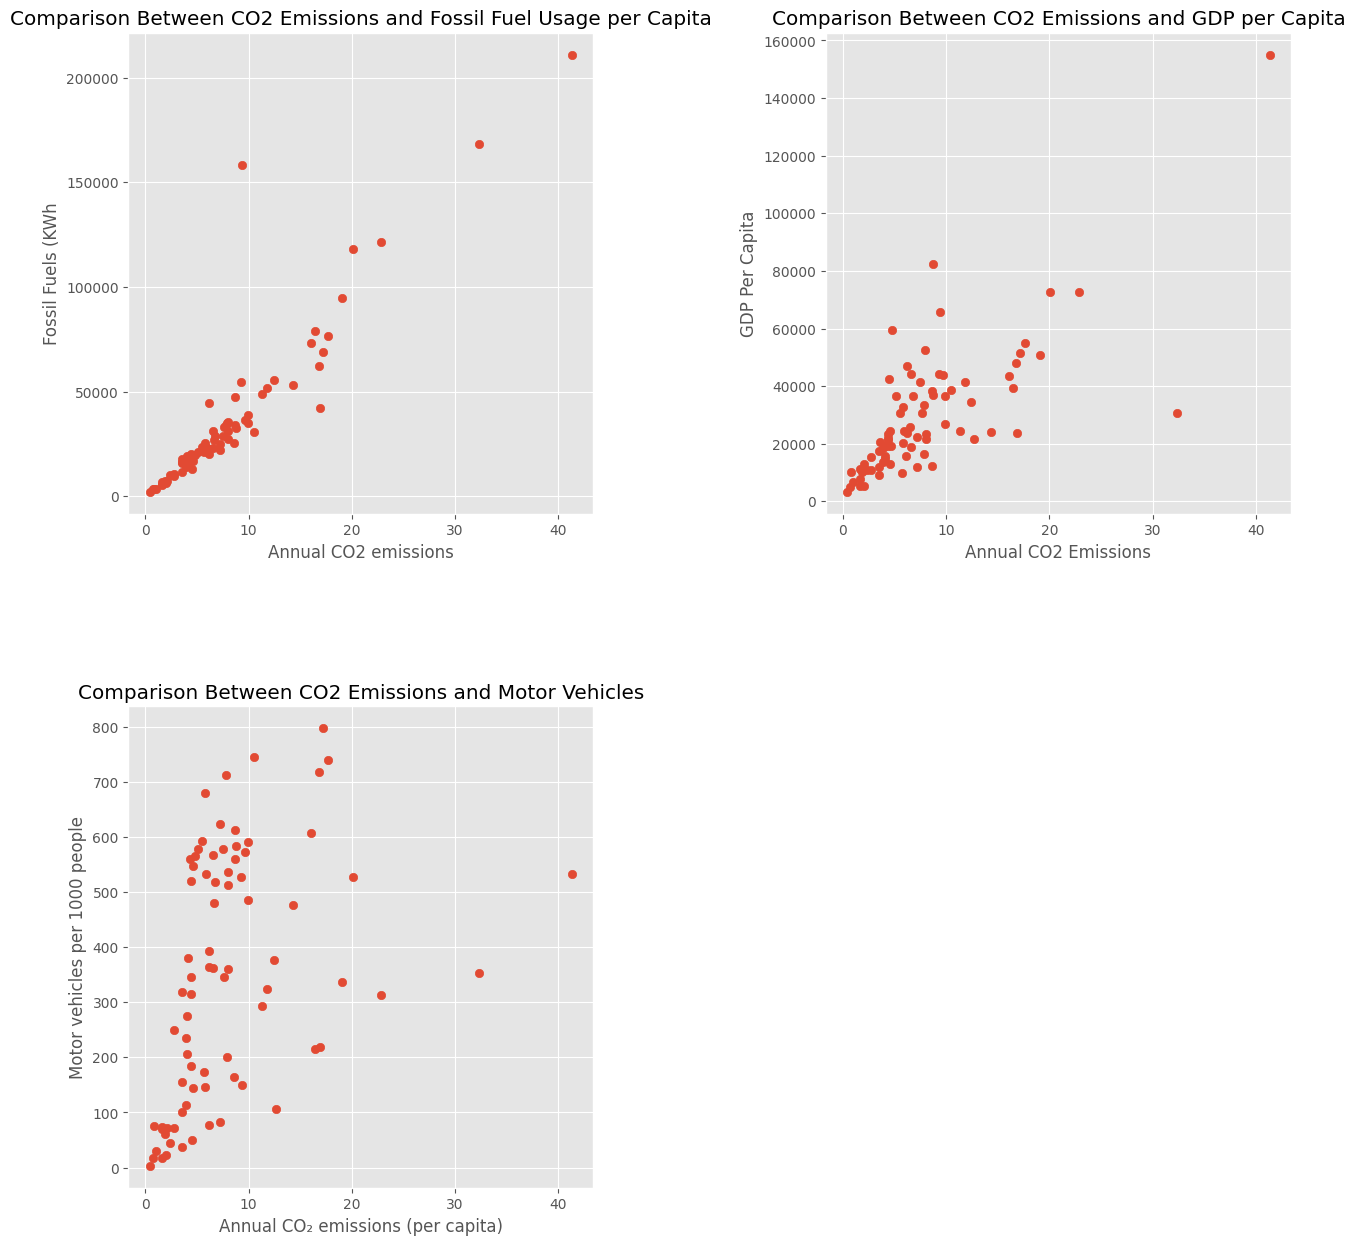

In [ ]:
# Creating overview of all plots in one.
plt.subplots(figsize = (15,15))
plt.subplot(2, 2, 1)
plt.scatter(x1, y1, )
plt.ylabel("Fossil Fuels (KWh")
plt.xlabel("Annual CO2 emissions")
plt.title("Comparison Between CO2 Emissions and Fossil Fuel Usage per Capita")


plt.subplots_adjust(hspace=0.4, wspace=0.5)
plt.subplot(2, 2, 2)
plt.scatter(x2, y2)
plt.ylabel("GDP Per Capita")
plt.xlabel("Annual CO2 Emissions")
plt.title("Comparison Between CO2 Emissions and GDP per Capita")


plt.subplot(2, 2, 3)
plt.scatter(x3, y3)
plt.ylabel("Motor vehicles per 1000 people")
plt.xlabel("Annual CO₂ emissions (per capita)")
plt.title("Comparison Between CO2 Emissions and Motor Vehicles")
plt.show()

In [ ]:
display(new_df)

,Country,Year,Annual_co2,Annual_co2_per_cap,GDP_per_cap,Fossil_per_cap,Nuclear_per_cap,Renewable_per_cap,Cars_per_1000
0,Algeria,2014,1.512828e+08,3.903047,13744.0,15027.486328,0.000000,17.678438,114
1,Argentina,2014,1.883965e+08,4.399314,19183.0,20108.048828,336.192535,2536.880859,314
2,Australia,2014,3.939529e+08,16.785683,47867.0,62277.480469,0.000000,3960.939941,717
3,Austria,2014,6.416000e+07,7.507548,41338.0,29037.287109,0.000000,16791.980469,578
4,Azerbaijan,2014,3.434843e+07,3.525852,17439.0,16081.031250,NaN,401.112335,101
...,...,...,...,...,...,...,...,...,...
74,United Kingdom,2014,4.388071e+08,6.774484,36436.0,28730.859375,2533.077881,3045.734131,519
75,United States,2014,5.528871e+09,17.168596,51664.0,68806.257812,6845.298340,5924.801758,797
76,Uzbekistan,2014,1.073995e+08,3.527477,9085.0,17980.089844,NaN,550.699280,37
77,Venezuela,2014,1.759613e+08,5.827834,20317.0,25457.541016,0.000000,7256.701660,147


In [ ]:
# Create dataframe for correlation between CO2 emission and Fossil Fuel Use
co2_fossil_fuel_use_correlation_df = new_df.iloc[:,  [3, 5]].copy()
co2_fossil_fuel_use_correlation_df
co2_fossil_fuel_use_correlation_df.dropna(inplace=True) 
co2_fossil_fuel_use_correlation_df.reset_index(drop=True, inplace=True)

# Calculate correlation and p-value
pearson_corr_co2_fossil_fuel = pearsonr(co2_fossil_fuel_use_correlation_df['Annual_co2_per_cap'], co2_fossil_fuel_use_correlation_df['Fossil_per_cap'])
display(pearson_corr_co2_fossil_fuel)

# Add Corr and P-Value to a list
pearson_pvalue_list = []
pearson_pvalue_list.append(['Fossil_per_cap', pearson_corr_co2_fossil_fuel[0], pearson_corr_co2_fossil_fuel[1]])

PearsonRResult(statistic=0.9128067035570198, pvalue=2.7572563373324517e-31)

In [ ]:
#display(pearson_pvalue_list)

In [ ]:
# Create dataframe for correlation between CO2 emission and GDP per Cap
co2_gdp_correlation_df = new_df.iloc[:,  [3, 4]].copy()
co2_gdp_correlation_df
co2_gdp_correlation_df.dropna(inplace=True)
co2_gdp_correlation_df.reset_index(drop=True, inplace=True)

# Calculate correlation and p-value
pearson_corr_co2_gdp = pearsonr(co2_gdp_correlation_df ['Annual_co2_per_cap'], co2_gdp_correlation_df ['GDP_per_cap'])
display(pearson_corr_co2_gdp)

# Add Corr and P-Value to a list
pearson_pvalue_list.append(['GDP_per_cap', pearson_corr_co2_gdp[0], pearson_corr_co2_gdp[1]])

PearsonRResult(statistic=0.7451109734774232, pvalue=3.4313821695226762e-15)

In [ ]:
# Create dataframe for correlation between CO2 emission and Motor Vehicles
co2_cars_correlation_df = new_df.iloc[:,  [3,-1 ]].copy()
co2_cars_correlation_df
co2_cars_correlation_df.dropna(inplace=True)
co2_cars_correlation_df.reset_index(drop=True, inplace=True)

# Calculate correlation and p-value
pearson_corr_co2_cars = pearsonr(co2_cars_correlation_df ['Annual_co2_per_cap'], co2_cars_correlation_df ['Cars_per_1000'])
display(pearson_corr_co2_cars)

# Add Corr and P-Value to a list
pearson_pvalue_list.append(['GDP_per_cap', pearson_corr_co2_cars[0], pearson_corr_co2_cars[1]])

PearsonRResult(statistic=0.3995647707918239, pvalue=0.00026429124510230693)

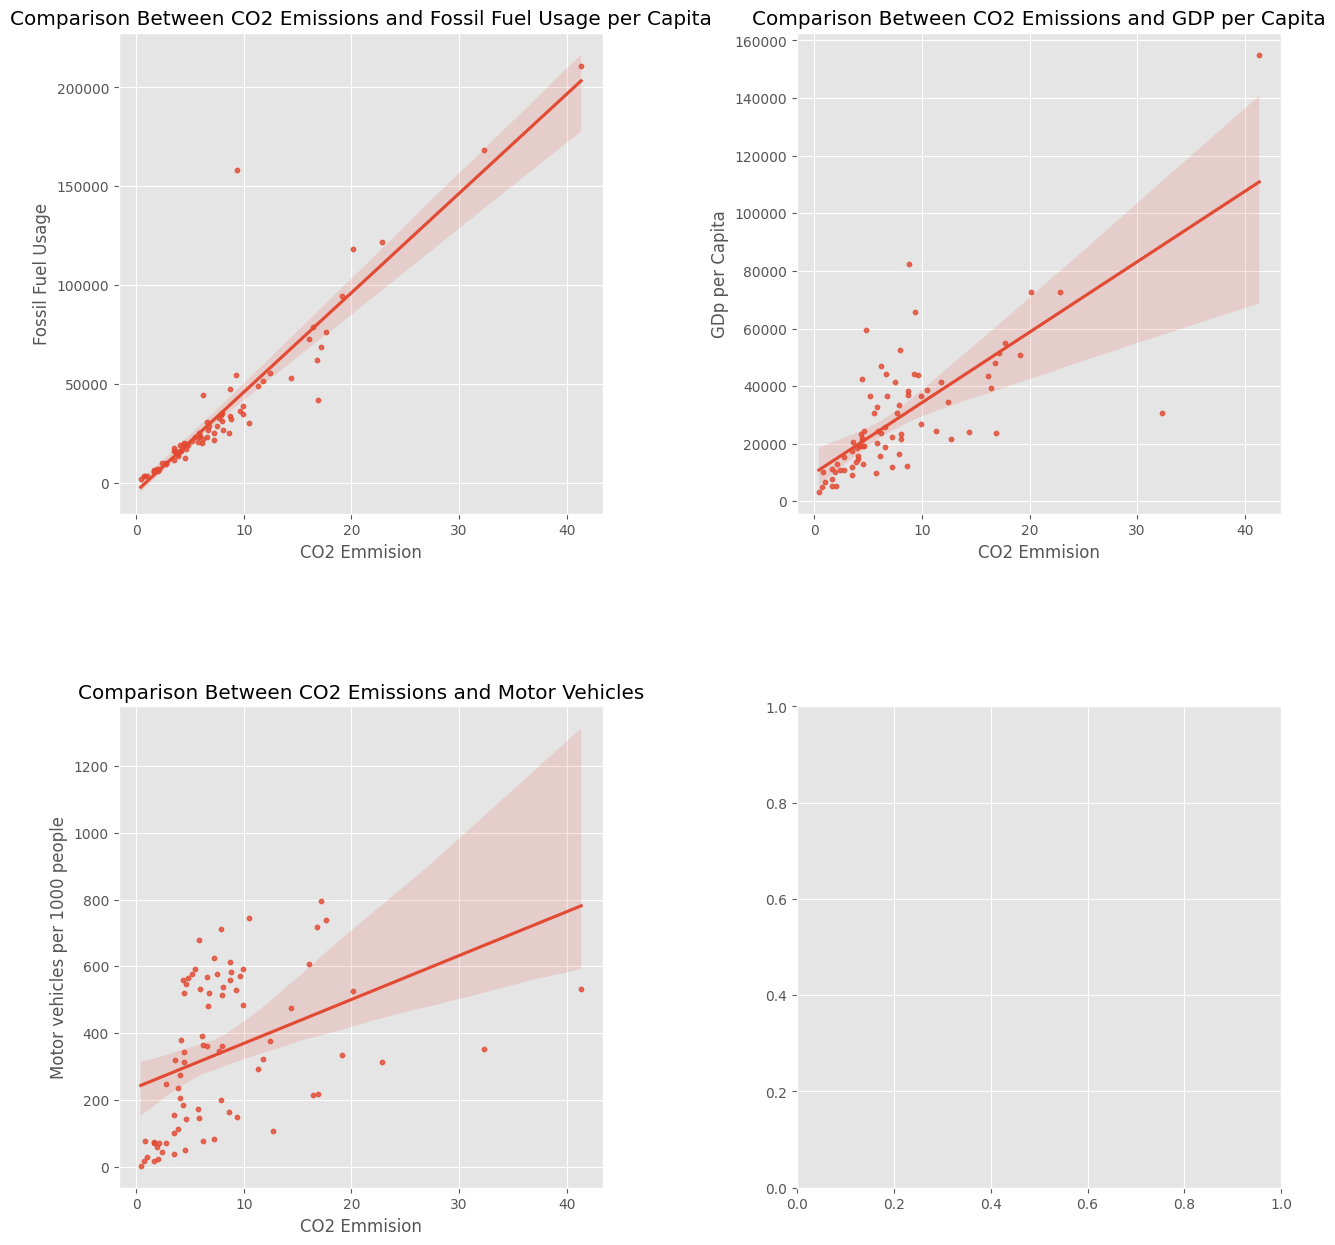

In [ ]:
# Create figures with correlation or each plot in one overview
fig, axs = plt.subplots(2,2, figsize = (15,15))

sns.regplot(x='Annual_co2_per_cap', y='Fossil_per_cap', data= co2_fossil_fuel_use_correlation_df, 
scatter_kws={'s':10}, ax=axs[0, 0])
axs[0, 0].set_title("Comparison Between CO2 Emissions and Fossil Fuel Usage per Capita")
axs[0, 0].set_xlabel("CO2 Emmision")
axs[0, 0].set_ylabel("Fossil Fuel Usage" )

sns.regplot(x='Annual_co2_per_cap', y='GDP_per_cap', data= co2_gdp_correlation_df, 
scatter_kws={'s':10}, ax=axs[0, 1])
axs[0, 1].set_title("Comparison Between CO2 Emissions and GDP per Capita")
axs[0, 1].set_xlabel("CO2 Emmision")
axs[0, 1].set_ylabel("GDp per Capita" )

sns.regplot(x='Annual_co2_per_cap', y='Cars_per_1000', data= co2_cars_correlation_df, 
scatter_kws={'s':10}, ax=axs[1, 0])
axs[1, 0].set_title("Comparison Between CO2 Emissions and Motor Vehicles")
axs[1, 0].set_xlabel("CO2 Emmision")
axs[1, 0].set_ylabel("Motor vehicles per 1000 people" )

fig.subplots_adjust(wspace=0.4, hspace=0.4)

# 2: Biggest strides in decreasing CO2 output


In [ ]:
output_df = emissions.pivot(index='Entity', columns='Year', values='Annual CO₂ emissions')
capita_output_df =  capita.pivot(index='Entity', columns='Year', values='Annual CO₂ emissions (per capita)')

# Select only last 30 years
output_df = output_df.drop(columns = output_df.columns[:-31])
capita_output_df = capita_output_df.drop(columns = capita_output_df.columns[:-31])

# Relative change between 1991 and 2021
output_df['change'] = (output_df.loc[:, 2021] - output_df.loc[:, 1991])
output_df['relative'] = (output_df.loc[:, 'change'] / output_df.loc[:, 1991]) * 100

capita_output_df['change'] = (capita_output_df.loc[:, 2021] - capita_output_df.loc[:, 1991])
capita_output_df['relative'] = (capita_output_df.loc[:, 'change'] / capita_output_df.loc[:, 1991]) * 100

# Sort from big to small 
big_change = output_df.sort_values("relative")
capita_big_change = capita_output_df.sort_values("relative")

# big_change['country'] = big_change.index
capita_big_change['country'] = capita_big_change.index


capita_big_change.sort_values("relative").head()

Year,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2015,2016,2017,2018,2019,2020,2021,change,relative,country
Entity,,,,,,,,,,,,,,,,,,,,,
Kuwait,367.927920,18.294262,29.709675,33.651417,32.980118,29.303770,31.036915,28.336819,28.668217,27.590618,...,23.651518,25.171660,23.258196,22.478844,23.498793,22.882670,24.972116,-342.955804,-93.212770,Kuwait
Moldova,6.576870,4.667079,3.526229,2.772321,2.556556,2.638051,1.661740,1.480139,1.088430,0.840384,...,1.459015,1.520459,1.641404,1.733205,1.765773,1.701957,1.829657,-4.747214,-72.180437,Moldova
French Guiana,6.848721,6.665894,6.828456,5.842478,5.276881,4.195408,3.765573,4.285594,3.310401,3.106944,...,2.724782,2.725494,2.624028,2.540044,2.534105,2.238595,2.189799,-4.658923,-68.026164,French Guiana
Democratic Republic of Congo,0.084222,0.073260,0.067263,0.040909,0.048598,0.052383,0.041842,0.036071,0.027896,0.018363,...,0.035505,0.024734,0.029352,0.028385,0.028980,0.026740,0.027183,-0.057039,-67.724420,Democratic Republic of Congo
Somalia,0.105097,0.105900,0.096730,0.090436,0.081695,0.076002,0.069639,0.063667,0.058558,0.055035,...,0.045787,0.044605,0.042891,0.041369,0.039893,0.034968,0.035766,-0.069331,-65.968200,Somalia


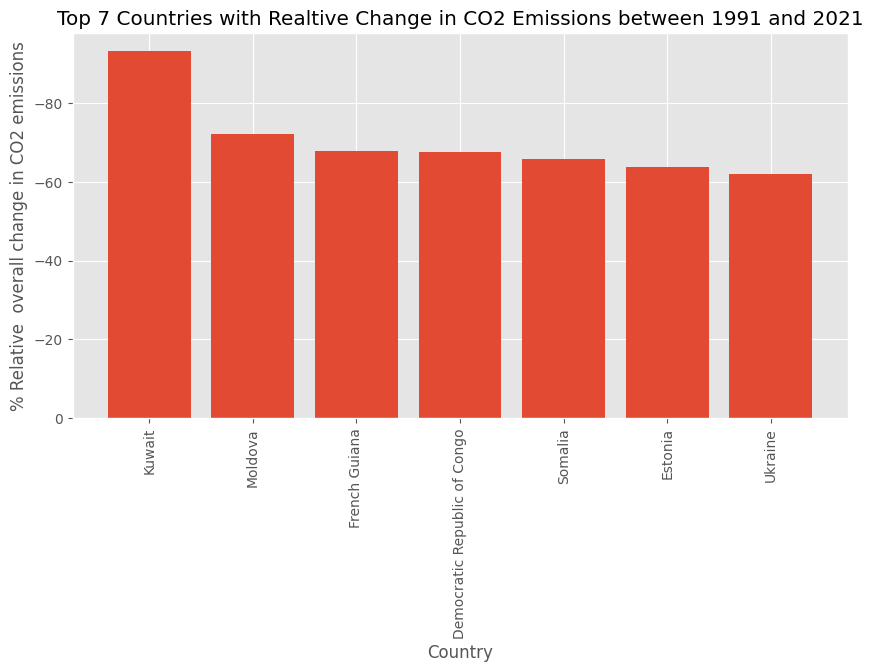

In [ ]:
# Creating figure
# First 7 rows and last column Country
x = capita_big_change.iloc[0:7, -1] 
y = capita_big_change.iloc[0:7, -2]

plt.figure(figsize=(10,5))
plt.gca().invert_yaxis()
plt.bar(x,y)


plt.xticks(rotation = 90)
plt.xlabel("Country")
plt.ylabel("% Relative  overall change in CO2 emissions")
plt.title("Top 7 Countries with Realtive Change in CO2 Emissions between 1991 and 2021")
plt.show()

# 3: Best future price for non-fossil fuel energy


In [ ]:
world_cost

,Country,Year,Bioenergy,Geothermal,Offshore_wind,Solar_photovoltaic,Solar_concentrated,Hydropower,Onshore_wind
447,World,2010,0.078189,0.050445,0.187857,0.417149,0.358004,0.038883,0.102061
449,World,2012,0.061879,0.085695,0.166601,0.232633,0.337574,0.038038,0.088390
450,World,2013,0.082198,0.064111,0.166662,0.179401,0.248888,0.042512,0.089206
451,World,2014,0.082375,0.065335,0.172199,0.161258,0.216377,0.042457,0.080203
452,World,2015,0.072771,0.058849,0.140527,0.121080,0.223889,0.036572,0.068962
453,World,2016,0.071178,0.067802,0.116323,0.106340,0.247269,0.048389,0.063855
454,World,2017,0.071070,0.070917,0.106152,0.083660,0.206213,0.050722,0.059959
455,World,2018,0.055360,0.067583,0.100049,0.071139,0.149103,0.039837,0.050880
456,World,2019,0.063933,0.067305,0.086388,0.062119,0.211831,0.041409,0.044592
457,World,2020,0.072473,0.054264,0.086266,0.055444,0.106653,0.045966,0.037137


In [ ]:
# cost
cost.drop(columns = 'Code', inplace = True)
cost.columns = ['Country', 'Year', 'Bioenergy', 'Geothermal', 'Offshore_wind', 'Solar_photovoltaic', 'Solar_concentrated', 'Hydropower', 'Onshore_wind']

world_cost = cost[cost['Country'].str.contains('World')]
world_cost = world_cost.dropna()

In [ ]:
# Toke values to calculate regression
x = world_cost.Year
bio = world_cost.Bioenergy
geo = world_cost.Geothermal
offshorew = world_cost.Offshore_wind
solarp = world_cost.Solar_photovoltaic
solarc = world_cost.Solar_concentrated
hydro = world_cost.Hydropower
onshorew = world_cost.Onshore_wind

# Reshaping values for calculation
x = x.values.reshape(11, 1)
bio = bio.values.reshape(11, 1)
geo= geo.values.reshape(11, 1)
offwind = offshorew.values.reshape(11, 1)
solarp = solarp.values.reshape(11, 1)
solarc = solarc.values.reshape(11, 1)
hydro = hydro.values.reshape(11, 1)
onwind = onshorew.values.reshape(11, 1)




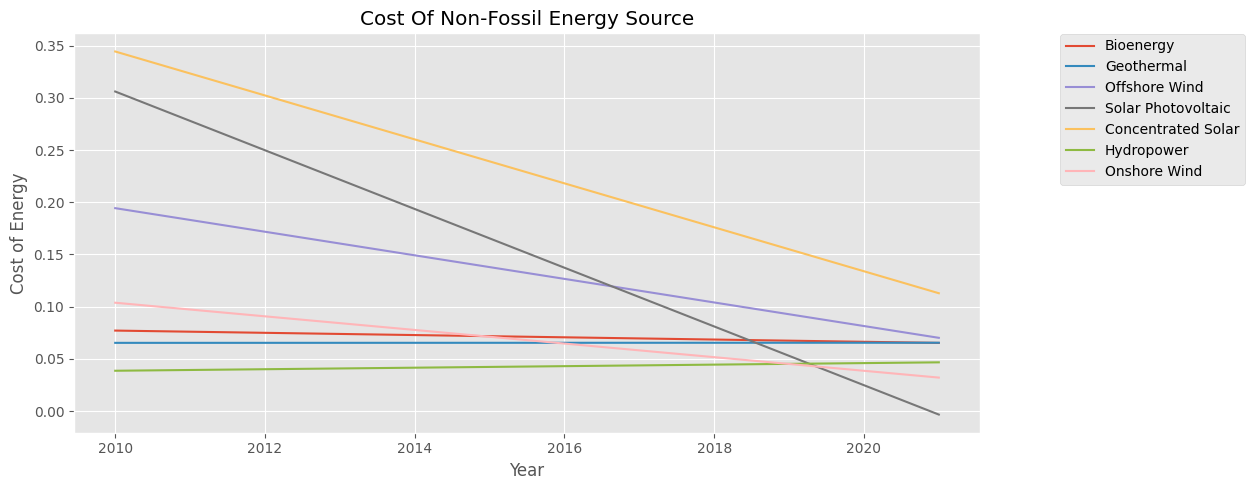

In [ ]:
# Regression Types of Energy
regression = LinearRegression()
regression.fit(x, bio)

plt.figure(figsize=(10,5))

regression.fit(x, bio)
plt.plot(x, regression.predict(x) , label="Bioenergy")

regression.fit(x, geo)
plt.plot(x, regression.predict(x), label="Geothermal")

regression.fit(x, offshorew)
plt.plot(x, regression.predict(x), label="Offshore Wind")

regression.fit(x, solarp)
plt.plot(x, regression.predict(x), label="Solar Photovoltaic")

regression.fit(x, solarc)
plt.plot(x, regression.predict(x), label="Concentrated Solar")

regression.fit(x, hydro)
plt.plot(x, regression.predict(x), label="Hydropower")

regression.fit(x, onshorew)
plt.plot(x, regression.predict(x), label="Onshore Wind")

# Creating figure
plt.ylabel("Cost of Energy")
plt.xlabel("Year")
plt.title("Cost Of Non-Fossil Energy Source")
plt.tight_layout()
plt.legend(loc='right', bbox_to_anchor=(1.3, 0.81))


In [ ]:
# https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html
# https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

def prepare_dataset(df, x_column, y_column):
  # Create dataframe with selection data
  selection_df = df.loc[:, [x_column, y_column]]
  selection_df.dropna(inplace=True)

  # Create stistical summary
  display(selection_df.describe())

  return selection_df


def linear_regression(selection_df, x_column, y_column):
  # Divide data to get x- and y-values
  x = selection_df[x_column].values.reshape(-1, 1)
  y = selection_df[y_column].values.reshape(-1, 1)

  # Divide data in train and test set
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  # Train model
  regressor = LinearRegression()
  regressor.fit(x_train, y_train)

  reg_intercept = regressor.intercept_[0]
  reg_coef = regressor.coef_[0][0]

  print(f'The intercept value is: {reg_intercept}\nThe slope value is: {reg_coef}')

  # Test model
  y_pred = regressor.predict(x_test)
  pred_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

  pred_df2 = pred_df.head(25)
  pred_df2.plot(kind='bar',figsize=(16,10))
  plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
  plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
  plt.show()

  # Plot the straight line with the test data
  plt.scatter(x_test, y_test,  color='gray')
  plt.plot(x_test, y_pred, color='red', linewidth=2)
  plt.show()

  # Evaluate model
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)

  print(f'Mean absolute error: {mae:.2f}')
  print(f'Mean squared error: {mse:.2f}')
  print(f'Root mean squared error: {rmse:.2f}')

  return reg_intercept, reg_coef


def calculate_future_data(selection_df, reg_coef, reg_intercept, x_column, y_column):
  x_values = range(2022, 2050
                   )
  future_data = []

  for x in x_values:
    y_value = (reg_intercept * x) + reg_coef
    future_data.append([x, y_value])

  future_data_df = pd.DataFrame(future_data)
  future_data_df.columns = [x_column, y_column]

  frames = [selection_df, future_data_df]
  selection_with_future_data = pd.concat(frames)
  selection_with_future_data.reset_index(inplace=True)
  selection_with_future_data.drop(['index'], axis=1, inplace=True)

  return selection_with_future_data

In [ ]:
# Bioenergy
selection_data_df = prepare_dataset(world_cost, 'Year', "Bioenergy")
intercept_and_coef = linear_regression(selection_data_df, 'Year', "Bioenergy")
future_data_bioenergy = calculate_future_data(selection_data_df, intercept_and_coef[0], intercept_and_coef[1], 'Year', "Bioenergy")
display(future_data_bioenergy)

sns.scatterplot(data=world_cost, x="Year", y="Bioenergy")

In [ ]:
# Geothermal 
selection_data_df = prepare_dataset(world_cost, 'Year', "Geothermal")
intercept_and_coef = linear_regression(selection_data_df, 'Year', "Geothermal")
future_data_geothermal = calculate_future_data(selection_data_df, intercept_and_coef[0], intercept_and_coef[1], 'Year', "Geothermal")
display(future_data_geothermal)

sns.scatterplot(data=world_cost, x="Year", y="Geothermal")

In [ ]:
# Offshore wind 
selection_data_df = prepare_dataset(world_cost, 'Year', "Offshore_wind")
intercept_and_coef = linear_regression(selection_data_df, 'Year', "Offshore_wind")
future_data_offshore_wind = calculate_future_data(selection_data_df, intercept_and_coef[0], intercept_and_coef[1], 'Year', "Offshore_wind")
display(future_data_offshore_wind)

sns.scatterplot(data=world_cost, x="Year", y="Offshore_wind")

In [ ]:
# Solar_photovoltaic
selection_data_df = prepare_dataset(world_cost, 'Year', "Solar_photovoltaic")
intercept_and_coef = linear_regression(selection_data_df, 'Year', "Solar_photovoltaic")
future_data_solar_photovoltaic = calculate_future_data(selection_data_df, intercept_and_coef[0], intercept_and_coef[1], 'Year', "Solar_photovoltaic")
display(future_data_solar_photovoltaic)

sns.scatterplot(data=world_cost, x="Year", y="Solar_photovoltaic")

In [ ]:
# Solar_concentrated
selection_data_df = prepare_dataset(world_cost, 'Year', "Solar_concentrated")
intercept_and_coef = linear_regression(selection_data_df, 'Year', "Solar_concentrated")
future_data_solar_concentrated = calculate_future_data(selection_data_df, intercept_and_coef[0], intercept_and_coef[1], 'Year', "Solar_concentrated")
display(future_data_solar_concentrated)

sns.scatterplot(data=world_cost, x="Year", y="Solar_concentrated")

In [ ]:
# Hydropower
selection_data_df = prepare_dataset(world_cost, 'Year', "Hydropower")
intercept_and_coef = linear_regression(selection_data_df, 'Year', "Hydropower")
future_data_hydropower = calculate_future_data(selection_data_df, intercept_and_coef[0], intercept_and_coef[1], 'Year', "Hydropower")
display(future_data_hydropower)

sns.scatterplot(data=world_cost, x="Year", y="Hydropower")

In [ ]:
# Onshore_wind
selection_data_df = prepare_dataset(world_cost, 'Year', "Onshore_wind")
intercept_and_coef = linear_regression(selection_data_df, 'Year', "Onshore_wind")
future_data_onshore_wind = calculate_future_data(selection_data_df, intercept_and_coef[0], intercept_and_coef[1], 'Year', "Onshore_wind")
display(future_data_onshore_wind)

sns.scatterplot(data=world_cost, x="Year", y="Onshore_wind")

In [ ]:
# Merge dataframes with calculated future data
data_frames = [future_data_bioenergy, future_data_geothermal, future_data_offshore_wind, future_data_solar_photovoltaic, future_data_solar_concentrated, future_data_onshore_wind]

future_data_df = reduce(lambda  left,right: pd.merge(left,right,on=['Year'], how='left'), data_frames)
display(future_data_df)

,Year,Bioenergy,Geothermal,Offshore_wind,Solar_photovoltaic,Solar_concentrated,Onshore_wind
0,2010,0.078189,0.050445,0.187857,0.417149,0.358004,0.102061
1,2012,0.061879,0.085695,0.166601,0.232633,0.337574,0.088390
2,2013,0.082198,0.064111,0.166662,0.179401,0.248888,0.089206
3,2014,0.082375,0.065335,0.172199,0.161258,0.216377,0.080203
4,2015,0.072771,0.058849,0.140527,0.121080,0.223889,0.068962
5,2016,0.071178,0.067802,0.116323,0.106340,0.247269,0.063855
6,2017,0.071070,0.070917,0.106152,0.083660,0.206213,0.059959
7,2018,0.055360,0.067583,0.100049,0.071139,0.149103,0.050880
8,2019,0.063933,0.067305,0.086388,0.062119,0.211831,0.044592
9,2020,0.072473,0.054264,0.086266,0.055444,0.106653,0.037137


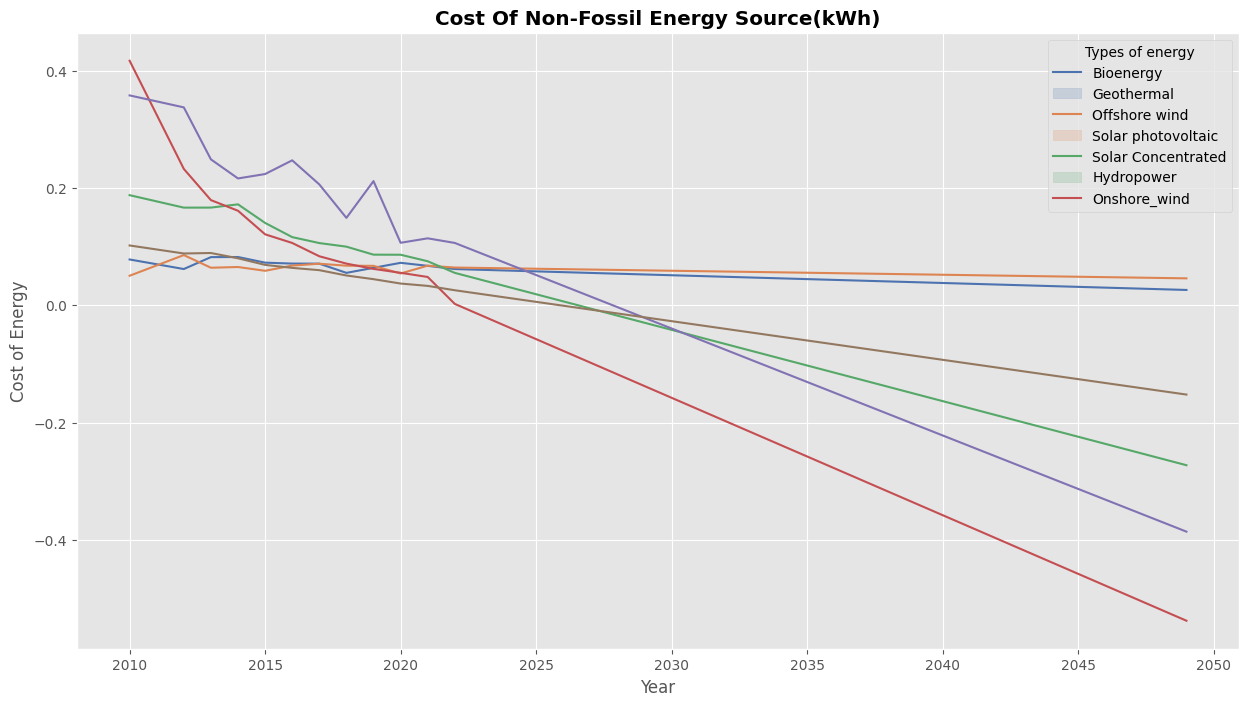

In [ ]:
#Plot data
future_data_plot_df = future_data_df.copy()
future_data_plot_df = future_data_plot_df.melt(id_vars=['Year'], value_name='Values', var_name='Variables')



fig, ax = plt.subplots(figsize = (15,8))
sns.lineplot(data=future_data_plot_df, x="Year", y="Values", hue="Variables", palette="deep")
ax.set_ylabel('Cost of Energy')
ax.set_xlabel('Year')
ax.set_title('Cost Of Non-Fossil Energy Source(kWh)', fontweight='bold')
plt.legend(title='Types of energy', labels=['Bioenergy', 'Geothermal', 'Offshore wind', 'Solar photovoltaic', 'Solar Concentrated', 'Hydropower', 'Onshore_wind'])